In [1]:
from __future__ import print_function
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input,UpSampling2D
#from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Model
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.layers import merge
#keras.layers.Concatenate
#from keras.layers import Concatenate
from keras.layers import Reshape
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [27]:
data_path4 = r"C:\Users\laksh\Desktop\internship\incremental codes\incremental codes\TRAIN"

In [28]:
import numpy as np
import os
import matplotlib.pyplot as plt
imgs4 = np.empty((256, 256), int)
filenames = sorted(os.listdir(data_path4))
p4=0
d4=[]
for img_name in filenames:
    img = plt.imread(data_path4 + img_name)
    img  = np.resize(img, (256, 256))
    if p4==0:
      imgs4=(img)
      p4=1
    else:
      imgs4 = np.append(imgs4, img, axis=0)
    res = img_name[:3]
    d4.append(res)
print(d4)
    
print(imgs4.shape)
        
img_data = np.array(imgs4)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\laksh\\Desktop\\internship\\incremental codes\\incremental codes\\TRAINcat.1.jpg'

In [4]:
imgs4 = np.reshape(imgs4, [ 480, 256, 256])
train_images, test_images = train_test_split(imgs4,test_size=0.33, random_state=42)
nRows,nCols = train_images.shape[1:]
nDims = nRows
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(train_images.shape)
print(test_images.shape)


(321, 256, 256)
(159, 256, 256)


In [5]:
import numpy as np
imgs = np.reshape(imgs4, [ 480, 256, 256])
train_images, test_images, train_labels, test_labels = train_test_split(imgs4, d4, test_size=0.33, random_state=42)
print('Training data shape : ', train_images.shape, len(train_labels))
print('Testing data shape : ', test_images.shape, len(test_labels))
classes = np.unique(train_labels)
classes=np.append(classes,0)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (321, 256, 256) 321
Testing data shape :  (159, 256, 256) 159
Total number of outputs :  8
Output classes :  ['cat' 'dog' 'e03' 'e13' 'e83' 'ea3' 'hor' '0']


(256, 256)


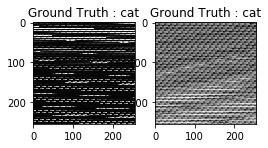

In [6]:
plt.figure(figsize=[4,2])
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
print(train_images.shape[1:])

In [7]:
train_labels

['cat',
 'cat',
 'e83',
 'hor',
 'dog',
 'ea3',
 'hor',
 'e83',
 'e83',
 'dog',
 'hor',
 'dog',
 'ea3',
 'cat',
 'dog',
 'dog',
 'hor',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'e13',
 'dog',
 'hor',
 'hor',
 'cat',
 'hor',
 'dog',
 'ea3',
 'dog',
 'cat',
 'e83',
 'hor',
 'dog',
 'cat',
 'e83',
 'hor',
 'hor',
 'ea3',
 'e13',
 'ea3',
 'hor',
 'hor',
 'hor',
 'cat',
 'dog',
 'dog',
 'ea3',
 'dog',
 'e83',
 'e83',
 'cat',
 'cat',
 'dog',
 'hor',
 'cat',
 'ea3',
 'ea3',
 'dog',
 'dog',
 'dog',
 'hor',
 'dog',
 'e83',
 'cat',
 'hor',
 'cat',
 'cat',
 'cat',
 'hor',
 'dog',
 'hor',
 'e83',
 'dog',
 'e83',
 'e83',
 'hor',
 'dog',
 'cat',
 'dog',
 'dog',
 'e13',
 'dog',
 'cat',
 'cat',
 'hor',
 'cat',
 'hor',
 'dog',
 'ea3',
 'cat',
 'dog',
 'dog',
 'hor',
 'hor',
 'e83',
 'cat',
 'hor',
 'dog',
 'dog',
 'dog',
 'e13',
 'e83',
 'e83',
 'ea3',
 'e83',
 'hor',
 'hor',
 'dog',
 'e83',
 'dog',
 'hor',
 'dog',
 'dog',
 'hor',
 'e83',
 'e83',
 'hor',
 'e83',
 'ea3',
 'hor',
 'ea3',
 'hor',
 'cat',


In [8]:
print(train_labels)
#train_labels= [0 if i =='hor' else 1 if i =='dog' else 2 for i in train_labels]
train_labels= [0 if i =='hor' else 1 if i =='dog' else 2 if i == 'cat' else 3 for i in train_labels]
print(train_labels)

['cat', 'cat', 'e83', 'hor', 'dog', 'ea3', 'hor', 'e83', 'e83', 'dog', 'hor', 'dog', 'ea3', 'cat', 'dog', 'dog', 'hor', 'dog', 'dog', 'cat', 'dog', 'dog', 'e13', 'dog', 'hor', 'hor', 'cat', 'hor', 'dog', 'ea3', 'dog', 'cat', 'e83', 'hor', 'dog', 'cat', 'e83', 'hor', 'hor', 'ea3', 'e13', 'ea3', 'hor', 'hor', 'hor', 'cat', 'dog', 'dog', 'ea3', 'dog', 'e83', 'e83', 'cat', 'cat', 'dog', 'hor', 'cat', 'ea3', 'ea3', 'dog', 'dog', 'dog', 'hor', 'dog', 'e83', 'cat', 'hor', 'cat', 'cat', 'cat', 'hor', 'dog', 'hor', 'e83', 'dog', 'e83', 'e83', 'hor', 'dog', 'cat', 'dog', 'dog', 'e13', 'dog', 'cat', 'cat', 'hor', 'cat', 'hor', 'dog', 'ea3', 'cat', 'dog', 'dog', 'hor', 'hor', 'e83', 'cat', 'hor', 'dog', 'dog', 'dog', 'e13', 'e83', 'e83', 'ea3', 'e83', 'hor', 'hor', 'dog', 'e83', 'dog', 'hor', 'dog', 'dog', 'hor', 'e83', 'e83', 'hor', 'e83', 'ea3', 'hor', 'ea3', 'hor', 'cat', 'dog', 'e83', 'ea3', 'e83', 'hor', 'ea3', 'dog', 'hor', 'dog', 'dog', 'dog', 'e83', 'dog', 'cat', 'dog', 'ea3', 'dog', 'hor'

In [9]:
print(test_labels)
#train_labels= [0 if i =='hor' else 1 if i =='dog' else 2 for i in train_labels]
test_labels= [0 if i =='hor' else 1 if i =='dog' else 2 if i == 'cat' else 3 for i in test_labels]
print(test_labels)

['cat', 'hor', 'hor', 'e83', 'hor', 'dog', 'e83', 'hor', 'cat', 'hor', 'cat', 'e83', 'hor', 'e83', 'cat', 'cat', 'cat', 'hor', 'cat', 'dog', 'dog', 'hor', 'cat', 'e83', 'cat', 'hor', 'ea3', 'e83', 'e83', 'cat', 'hor', 'cat', 'hor', 'hor', 'hor', 'cat', 'e83', 'dog', 'hor', 'cat', 'ea3', 'dog', 'cat', 'dog', 'cat', 'ea3', 'hor', 'cat', 'dog', 'cat', 'hor', 'ea3', 'hor', 'hor', 'e83', 'e83', 'cat', 'cat', 'hor', 'cat', 'hor', 'e83', 'cat', 'dog', 'dog', 'e83', 'e83', 'cat', 'cat', 'dog', 'e83', 'cat', 'dog', 'dog', 'dog', 'dog', 'e83', 'hor', 'ea3', 'cat', 'hor', 'cat', 'dog', 'hor', 'cat', 'e83', 'e83', 'cat', 'ea3', 'dog', 'hor', 'dog', 'dog', 'hor', 'cat', 'hor', 'dog', 'dog', 'hor', 'cat', 'hor', 'hor', 'dog', 'hor', 'dog', 'dog', 'hor', 'cat', 'hor', 'cat', 'dog', 'hor', 'dog', 'hor', 'hor', 'cat', 'dog', 'e83', 'hor', 'cat', 'cat', 'cat', 'hor', 'cat', 'cat', 'cat', 'dog', 'ea3', 'hor', 'hor', 'cat', 'ea3', 'dog', 'cat', 'dog', 'e83', 'hor', 'cat', 'cat', 'cat', 'cat', 'hor', 'hor'

In [10]:
from keras.utils import to_categorical

nRows,nCols = train_images.shape[1:]
nDims = nRows
print(nCols)
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(len(train_labels))
print(len(test_labels))
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print('Original label : ', train_labels[11])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[11])
print('Original label : ', test_labels[11])
print('After conversion to categorical ( one-hot ) : ', test_labels_one_hot[11])

256
321
159
Original label :  1
After conversion to categorical ( one-hot ) :  [0. 1. 0. 0.]
Original label :  3
After conversion to categorical ( one-hot ) :  [0. 0. 0. 1.]


In [11]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [15]:
 #Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256,1), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [16]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               15745152  
_________________________________________________________________
dense_4 (Dense)              (None, 4)                

In [17]:
history =classifier.fit(train_data,train_labels_one_hot,batch_size=1,epochs=10,verbose=1,validation_data=(test_data, test_labels_one_hot))

Train on 321 samples, validate on 159 samples
Epoch 1/10
321/321 [==============================] - 115s 357ms/step - loss: 0.6643 - accuracy: 0.7453 - val_loss: 0.5720 - val_accuracy: 0.7500
Epoch 2/10
321/321 [==============================] - 114s 354ms/step - loss: 0.5710 - accuracy: 0.7477 - val_loss: 0.5823 - val_accuracy: 0.7500
Epoch 3/10
321/321 [==============================] - 113s 353ms/step - loss: 0.5537 - accuracy: 0.7555 - val_loss: 0.5508 - val_accuracy: 0.7500
Epoch 4/10
321/321 [==============================] - 113s 353ms/step - loss: 0.5133 - accuracy: 0.7726 - val_loss: 0.5590 - val_accuracy: 0.7736
Epoch 5/10
321/321 [==============================] - 113s 351ms/step - loss: 0.4486 - accuracy: 0.7944 - val_loss: 0.4729 - val_accuracy: 0.7767
Epoch 6/10
321/321 [==============================] - 111s 346ms/step - loss: 0.3547 - accuracy: 0.8559 - val_loss: 0.5759 - val_accuracy: 0.7531
Epoch 7/10
321/321 [==============================] - 111s 344ms/step - loss: 

In [28]:
img='/home/apiiit-rkv/Desktop/h1.jpg'

In [35]:
imgs0 = np.empty((256, 256), int)
img = plt.imread('/home/apiiit-rkv/Desktop/hd2.jpg')
img  = np.resize(img, (256, 256))
#imgs0=img
#print(imgs0.shape)
#imgs0 = np.reshape(imgs0, [ 1, 256, 256])
#print(imgs0.shape)
#imgs0.shape[0]
fin = img.reshape(1, 256, 256, 1)

In [36]:
prediction=classifier.predict(fin,batch_size=None,steps=1)

In [37]:
prediction

array([[0., 0., 0., 1.]], dtype=float32)